In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings("ignore")


In [2]:
train=pd.read_csv("C:\\Users\\GTS\\Desktop\\AI Fatima\\Competitions\\Used Car Price Prediction\\train.csv", index_col=0)
train.head(1)

,id,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date,price
121610,7309831550,2007.0,infiniti,m45,excellent,NaN,gas,214740.0,clean,automatic,rwd,NaN,sedan,black,ga,34.139588,-83.971135,2021-04-20T11:46:13-0400,7995


In [3]:
test=pd.read_csv("C:\\Users\\GTS\\Desktop\\AI Fatima\\Competitions\\Used Car Price Prediction\\test.csv", index_col=0)
test.head(1)

,id,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date
316575,7313399730,2018.0,honda,civic,NaN,4 cylinders,gas,28898.0,clean,automatic,fwd,NaN,sedan,NaN,or,44.97143,-123.018548,2021-04-27T10:09:18-0700


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124341 entries, 316575 to 190395
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            124341 non-null  int64  
 1   year          124341 non-null  float64
 2   manufacturer  119488 non-null  object 
 3   model         124341 non-null  object 
 4   condition     74522 non-null   object 
 5   cylinders     72970 non-null   object 
 6   fuel          123696 non-null  object 
 7   odometer      124341 non-null  float64
 8   title_status  122132 non-null  object 
 9   transmission  124341 non-null  object 
 10  drive         86569 non-null   object 
 11  size          35237 non-null   object 
 12  type          97522 non-null   object 
 13  paint_color   86774 non-null   object 
 14  state         124341 non-null  object 
 15  lat           122380 non-null  float64
 16  long          122380 non-null  float64
 17  posting_date  124341 non-null  object 
dtypes: f

In [5]:
train.shape, test.shape

((290129, 19), (124341, 18))

In [6]:
train.isnull().sum()

id                   0
year                 0
manufacturer     11342
model                0
condition       116104
cylinders       119300
fuel              1453
odometer             0
title_status      5066
transmission         0
drive            88087
size            207684
type             62596
paint_color      87113
state                0
lat               4403
long              4403
posting_date         0
price                0
dtype: int64

In [7]:
test.isnull().sum()

id                  0
year                0
manufacturer     4853
model               0
condition       49819
cylinders       51371
fuel              645
odometer            0
title_status     2209
transmission        0
drive           37772
size            89104
type            26819
paint_color     37567
state               0
lat              1961
long             1961
posting_date        0
dtype: int64

## Year

**We are going to calculate the age of the car from year and posting_date columns then drop Them.**

In [ ]:
# convert to integer:

train.year=train.year.astype(int)
test.year=test.year.astype(int)

In [ ]:
print(train.year.isnull().sum())
print(test.year.isnull().sum())

In [ ]:
# calculate the work age of the car:
current_year = datetime.datetime.now().year
train.insert(1, 'age',0)

train['age']=train['year'].apply(lambda year: current_year - year)


test.insert(1, 'age',0)

test['age']=test['year'].apply(lambda year: current_year - year)

In [ ]:
train['age'].min(), train['age'].max()

In [ ]:
test

In [ ]:
plt.figure(figsize = (15, 8))
sns.countplot(x=train.age)
plt.xlabel("Count")
plt.ylabel("Age")
plt.title("Train Age frequency")
plt.xticks(rotation=90)
plt.show

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x=test.age)
plt.figure(figsize = (12, 20))
sns.countplot(y=test.age)
plt.xlabel("Count")
plt.ylabel("Age")
plt.title("Test Age frequency")
plt.xticks(rotation=90)
plt.show

In [ ]:
plt.scatter(x=train.price, y=train.age)

## odometer

In [ ]:
train.odometer.value_counts()

In [ ]:
test.odometer.value_counts()

In [ ]:
train.odometer.isnull().sum(),test.odometer.isnull().sum()

In [ ]:
train.odometer.min(), train.odometer.max()

**odometer has different value in different range, we can handle it in scalling step.** 

In [ ]:
plt.scatter(x=train.price, y=train.odometer)

## state

In [ ]:
train.state.value_counts()

In [ ]:
test.state.value_counts()

In [ ]:
train.state.isnull().sum(),test.state.isnull().sum()

In [ ]:
train.state.unique()

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(x=train.state)
plt.xlabel("State")
plt.ylabel("Count")
plt.title("Train State frequency")
plt.show

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(x=train.state,y=train.price)
plt.xlabel("State")
plt.ylabel("price")

plt.show

In [ ]:
state_counts = train['state'].value_counts()

# Get the list of manufacturers with counts less than 5000
state_to_replace = state_counts[state_counts < 5000].index.tolist()

# Replace 'manufacturer' values with counts less than 5000 with 'other'
train.loc[train['state'].isin(state_to_replace), 'state'] = 'other'

###########################################################
state_counts = test['state'].value_counts()

# Get the list of manufacturers with counts less than 5000
state_to_replace = state_counts[state_counts < 5000].index.tolist()

# Replace 'manufacturer' values with counts less than 5000 with 'other'
test.loc[test['state'].isin(state_to_replace), 'state'] = 'other'


## transmission

In [ ]:
train.transmission.value_counts()

In [ ]:
test.transmission.value_counts()

In [ ]:
train.transmission.isnull().sum(),test.transmission.isnull().sum()

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(x=train.transmission)
plt.xlabel("Count")
plt.ylabel("Transmission")
plt.title("Train Transmssion frequency")
plt.show

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(x=test.transmission)
plt.xlabel("Count")
plt.ylabel("Transmission")
plt.title("Test Transmission frequency")
plt.show

## manufacturer

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(x=train.manufacturer)
plt.xlabel("Count")
plt.ylabel("Manufacturer")
plt.title("Train Manufacturer frequency")
plt.xticks(rotation=90)
plt.show

In [ ]:
train.manufacturer.isnull().sum(),test.manufacturer.isnull().sum()

In [ ]:
train.model.value_counts()

In [ ]:
test.model.value_counts()

**we will use model to fill null values in the manufacturer then drop it**

In [13]:
mask = (train.manufacturer.isnull()) & (train.model == 'INTERNATIONAL WATER TRUCK')
train.loc[mask, 'manufacturer'] = 'navistar'
mask = (test.manufacturer.isnull()) & (test.model == 'INTERNATIONAL WATER TRUCK')
test.loc[mask, 'manufacturer'] = 'navistar'

mask = (train.manufacturer.isnull()) & ((train.model == 'International')|(train.model == 'INTERNATIONAL 4600')|(train.model == 'international 4700'))
train.loc[mask, 'manufacturer'] = 'navistar'
mask = (test.manufacturer.isnull()) & ((test.model == 'International')|(test.model == 'INTERNATIONAL 4600')|(test.model == 'international 4700'))
test.loc[mask, 'manufacturer'] = 'navistar'

mask = (train.manufacturer.isnull()) & ((train.model == 'International 3800 School Bus')|(train.model == 'international school bus'))
train.loc[mask, 'manufacturer'] = 'navistar'
mask = (test.manufacturer.isnull()) & (test.model == 'International 3800 School Bus')|(test.model == 'international school bus')
test.loc[mask, 'manufacturer'] = 'navistar'

mask = (train.manufacturer.isnull()) & (train.model == 'International 7400')
train.loc[mask, 'manufacturer'] = 'navistar'
mask = (test.manufacturer.isnull()) & (test.model == 'International 7400')
test.loc[mask, 'manufacturer'] = 'navistar'

mask = (train.manufacturer.isnull()) & (train.model == 'conversion van')
train.loc[mask, 'manufacturer'] = 'chevrolet'
mask = (test.manufacturer.isnull()) & (test.model == 'conversion van')
test.loc[mask, 'manufacturer'] = 'chevrolet'

mask = (train.manufacturer.isnull()) & (train.model == 'chysler convertible 200')
train.loc[mask, 'manufacturer'] = 'chrysler'
mask = (test.manufacturer.isnull()) & (test.model == 'chysler convertible 200')
test.loc[mask, 'manufacturer'] = 'chrysler'

mask = (train.manufacturer.isnull()) & ((train.model == 'Freightliner Cascadia')|(train.model == 'Freightliner M-Line Walk-in Van')|(train.model == 'freightliner m2 106 medium duty'))
train.loc[mask, 'manufacturer'] = 'dtna'
mask = (test.manufacturer.isnull()) & ((test.model == 'Freightliner Cascadia')|(test.model == 'Freightliner M-Line Walk-in Van')|(test.model == 'freightliner m2 106 medium duty'))
test.loc[mask, 'manufacturer'] = 'dtna'

mask = (train.manufacturer.isnull()) & (train.model == 'Thomas Saf-t-liner School Bus')
train.loc[mask, 'manufacturer'] = 'dtna'
mask = (test.manufacturer.isnull()) & (test.model == 'Thomas Saf-t-liner School Bus')
test.loc[mask, 'manufacturer'] = 'dtna'

mask = (train.manufacturer.isnull()) & (train.model == 'freightliner cascadia')
train.loc[mask, 'manufacturer'] = 'dtna'
mask = (test.manufacturer.isnull()) & (test.model == 'freightliner cascadia')
test.loc[mask, 'manufacturer'] = 'dtna'

mask = (train.manufacturer.isnull()) & (train.model == 'Freightliner Sprinter 2500 Crew')
train.loc[mask, 'manufacturer'] = 'dtna'
mask = (test.manufacturer.isnull()) & (test.model == 'Freightliner Sprinter 2500 Crew')
test.loc[mask, 'manufacturer'] = 'dtna'

mask = (train.manufacturer.isnull()) & (train.model == 'Silverado k2500hd')
train.loc[mask, 'manufacturer'] = 'chevrolet'
mask = (test.manufacturer.isnull()) & (test.model == 'Silverado k2500hd')
test.loc[mask, 'manufacturer'] = 'chevrolet'


mask = (train.manufacturer.isnull()) & (train.model == 'Scion XB')
train.loc[mask, 'manufacturer'] = 'scion'
mask = (test.manufacturer.isnull()) & (test.model == 'Scion XB')
test.loc[mask, 'manufacturer'] = 'Scion'

mask = (train.manufacturer.isnull()) & (train.model == 'Scion xB')
train.loc[mask, 'manufacturer'] = 'scion'
mask = (test.manufacturer.isnull()) & (test.model == 'Scion xB')
test.loc[mask, 'manufacturer'] = 'Scion'

mask = (train.manufacturer.isnull()) & (train.model == 'scion tc')
train.loc[mask, 'manufacturer'] = 'scion'
mask = (test.manufacturer.isnull()) & (test.model == 'scion tc')
test.loc[mask, 'manufacturer'] = 'Scion'

mask = (train.manufacturer.isnull()) & (train.model == 'SCION TC')
train.loc[mask, 'manufacturer'] = 'scion'
mask = (test.manufacturer.isnull()) & (test.model == 'SCION TC')
test.loc[mask, 'manufacturer'] = 'Scion'

mask = (train.manufacturer.isnull()) & (train.model == 'Suzuki SX4')
train.loc[mask, 'manufacturer'] = 'suzuki'
mask = (test.manufacturer.isnull()) & (test.model == 'Suzuki SX4')
test.loc[mask, 'manufacturer'] = 'suzuki'

mask = (train.manufacturer.isnull()) & (train.model == 'Suzuki SX4 Sport Sedan')
train.loc[mask, 'manufacturer'] = 'suzuki'
mask = (test.manufacturer.isnull()) & (test.model == 'Suzuki SX4 Sport Sedan')
test.loc[mask, 'manufacturer'] = 'suzuki'

mask = (train.manufacturer.isnull()) & (train.model == '2011 SUZUKI GRAND VITARA')
train.loc[mask, 'manufacturer'] = 'suzuki'
mask = (test.manufacturer.isnull()) & (test.model == '2011 SUZUKI GRAND VITARA')
test.loc[mask, 'manufacturer'] = 'suzuki'

mask = (train.manufacturer.isnull()) & ((train.model == 'isuzu rodeo')|(train.model == 'Isuzu NPR HD REG'))
train.loc[mask, 'manufacturer'] = 'isuzu'
mask = (test.manufacturer.isnull()) & ((test.model == 'isuzu rodeo')|(test.model == 'Isuzu NPR HD REG'))
test.loc[mask, 'manufacturer'] = 'isuzu'

mask = (train.manufacturer.isnull()) & (train.model == 'Isuzu NPR HD')
train.loc[mask, 'manufacturer'] = 'isuzu'
mask = (test.manufacturer.isnull()) & (test.model == 'Isuzu NPR HD')
test.loc[mask, 'manufacturer'] = 'isuzu'

mask = (train.manufacturer.isnull()) & (train.model == 'suzuki aerio')
train.loc[mask, 'manufacturer'] = 'suzuki'
mask = (test.manufacturer.isnull()) & (test.model == 'suzuki aerio')
test.loc[mask, 'manufacturer'] = 'suzuki'

mask = (train.manufacturer.isnull()) & (train.model == 'Suzuki Grand Vitara')
train.loc[mask, 'manufacturer'] = 'suzuki'
mask = (test.manufacturer.isnull()) & (test.model == 'Suzuki Grand Vitara')
test.loc[mask, 'manufacturer'] = 'suzuki'

mask = (train.manufacturer.isnull()) & (train.model == 'Genesis G70 3.3T Advanced Sedan')
train.loc[mask, 'manufacturer'] = 'genesis'
mask = (test.manufacturer.isnull()) & (test.model == 'Genesis G70 3.3T Advanced Sedan')
test.loc[mask, 'manufacturer'] = 'genesis'

mask = (train.manufacturer.isnull()) & (train.model == 'Genesis G80 3.8 Sedan 4D')
train.loc[mask, 'manufacturer'] = 'genesis'
mask = (test.manufacturer.isnull()) & (test.model == 'Genesis G80 3.8 Sedan 4D')
test.loc[mask, 'manufacturer'] = 'genesis'

mask = (train.manufacturer.isnull()) & ((train.model == 'Genesis G70 2.0T Advanced Sedan')|(train.model == 'Genesis G70 3.3T Dynamic Edition'))
train.loc[mask, 'manufacturer'] = 'genesis'
mask = (test.manufacturer.isnull()) & ((test.model == 'Genesis G70 2.0T Advanced Sedan')|(test.model == 'Genesis G70 3.3T Dynamic Edition'))
test.loc[mask, 'manufacturer'] = 'genesis'

mask = (train.manufacturer.isnull()) & (train.model == 'Genesis G80 3.8 automatic')
train.loc[mask, 'manufacturer'] = 'genesis'
mask = (test.manufacturer.isnull()) & (test.model == 'Genesis G80 3.8 automatic')
test.loc[mask, 'manufacturer'] = 'genesis'

mask = (train.manufacturer.isnull()) & (train.model == 'Genesis G70 3.3T Sedan 4D')
train.loc[mask, 'manufacturer'] = 'genesis'
mask = (test.manufacturer.isnull()) & (test.model == 'Genesis G70 3.3T Sedan 4D')
test.loc[mask, 'manufacturer'] = 'genesis'

mask = (train.manufacturer.isnull()) & (train.model == 'HUDSON Convertible')
train.loc[mask, 'manufacturer'] = 'hudson'
mask = (test.manufacturer.isnull()) & (test.model == 'HUDSON Convertible')
test.loc[mask, 'manufacturer'] = 'hudson'

mask = (train.manufacturer.isnull()) & ((train.model == 'Scion iM Hatchback 4D')|(train.model == 'Scion FR-S'))
train.loc[mask, 'manufacturer'] = 'scion'
mask = (test.manufacturer.isnull()) & ((test.model == 'Scion iM Hatchback 4D')|(test.model == 'Scion FR-S'))
test.loc[mask, 'manufacturer'] = 'scion'

mask = (train.manufacturer.isnull()) & ((train.model == '2013 scion fr-s')|(train.model == 'scion xa')|(train.model == 'scion xd')|(train.model == 'Scion FR-S Coupe 2D'))
train.loc[mask, 'manufacturer'] = 'scion'
mask = (test.manufacturer.isnull()) &((test.model == '2013 scion fr-s')|(test.model == 'scion xa')|(test.model == 'scion xd')|(test.model == 'Scion FR-S Coupe 2D'))
test.loc[mask, 'manufacturer'] = 'Scion'

mask = (train.manufacturer.isnull()) & (train.model == '2009 f350')
train.loc[mask, 'manufacturer'] = 'ford'
mask = (test.manufacturer.isnull()) & (test.model == '2009 f350')
test.loc[mask, 'manufacturer'] = 'ford'

mask = (train.manufacturer.isnull()) & ((train.model == 'BLUE BIRD BLUE BIRD')|(train.model == 'Blue Bird All American'))
train.loc[mask, 'manufacturer'] = 'blue bird'
mask = (test.manufacturer.isnull()) & ((test.model == 'BLUE BIRD BLUE BIRD')|(train.model == 'Blue Bird All American'))
test.loc[mask, 'manufacturer'] = 'blue bird'

mask = (train.manufacturer.isnull()) & ((train.model == 'hummer h2')|(train.model == 'hummer h2 luxury')|(train.model == 'HUMMER H3'))
train.loc[mask, 'manufacturer'] = 'general motors'
mask = (test.manufacturer.isnull()) & ((test.model == 'hummer h2')|(test.model == 'hummer h2 luxury')|(test.model == 'HUMMER H3'))
test.loc[mask, 'manufacturer'] = 'general motors'

mask = (train.manufacturer.isnull()) & (train.model == 'saab 9-3')
train.loc[mask, 'manufacturer'] = 'saab'
mask = (test.manufacturer.isnull()) & (test.model == 'saab 9-3')
test.loc[mask, 'manufacturer'] = 'saab'

mask = (train.manufacturer.isnull()) & ((train.model == 'mack')|(train.model == 'Mack Mack Granite Plow/Dump Truck W/Sander'))
train.loc[mask, 'manufacturer'] = 'mack'
mask = (test.manufacturer.isnull()) & ((test.model == 'mack')|(test.model == 'Mack Mack Granite Plow/Dump Truck W/Sander'))
test.loc[mask, 'manufacturer'] = 'mack'

mask = (train.manufacturer.isnull()) & (train.model == 'smart fortwo Passion Hatchback')
train.loc[mask, 'manufacturer'] = 'mercedes-benz'
mask = (test.manufacturer.isnull()) & (test.model == 'smart fortwo Passion Hatchback')
test.loc[mask, 'manufacturer'] = 'mercedes-benz'

mask = (train.manufacturer.isnull()) & (train.model == 'plymouth barracuda')
train.loc[mask, 'manufacturer'] = 'plymouth'
mask = (test.manufacturer.isnull()) & (test.model == 'plymouth barracuda')
test.loc[mask, 'manufacturer'] = 'plymouth'

mask = (train.manufacturer.isnull()) & (train.model == 'Toyoya RAV4')
train.loc[mask, 'manufacturer'] = 'toyota'
mask = (test.manufacturer.isnull()) & (test.model == 'Toyoya RAV4')
test.loc[mask, 'manufacturer'] = 'toyota'

mask = (train.manufacturer.isnull()) & (train.model == 'Toyoa pickup')
train.loc[mask, 'manufacturer'] = 'toyota'
mask = (test.manufacturer.isnull()) & (test.model == 'Toyoa pickup')
test.loc[mask, 'manufacturer'] = 'toyota'

mask = (train.manufacturer.isnull()) & (train.model == 'peterbilt')|(train.model == 'Peterbilt 379 EXHD')
train.loc[mask, 'manufacturer'] = 'peterbilt'
mask = (test.manufacturer.isnull()) & ((test.model == 'peterbilt')|(test.model == 'Peterbilt 379 EXHD'))
test.loc[mask, 'manufacturer'] = 'peterbilt'

mask = (train.manufacturer.isnull()) & ((train.model == 'CHEC MALIBU LS')|(train.model == 'Chevrolet-3RD ROW! LOCAL TRADE! Venture-$2995!!! PLUS TAX N TAG NDOC!') )
train.loc[mask, 'manufacturer'] = 'chevrolet'
mask = (test.manufacturer.isnull()) & (test.model == 'CHEC MALIBU LS')|(test.model == 'Chevrolet-3RD ROW! LOCAL TRADE! Venture-$2995!!! PLUS TAX N TAG NDOC!')
test.loc[mask, 'manufacturer'] = 'chevrolet'

mask = (train.manufacturer.isnull()) & (train.model == 'kenworth t660') 
train.loc[mask, 'manufacturer'] = 'kenworth'
mask = (test.manufacturer.isnull()) & (test.model == 'kenworth t660')
test.loc[mask, 'manufacturer'] = 'kenworth'

mask = (train.manufacturer.isnull()) & (train.model == 'Oldsmobile Bravada') 
train.loc[mask, 'manufacturer'] = 'general motors'
mask = (test.manufacturer.isnull()) & (test.model == 'Oldsmobile Bravada')
test.loc[mask, 'manufacturer'] = 'general motors'

mask = (train.manufacturer.isnull()) & (train.model == 'LEXUS* LS*') 
train.loc[mask, 'manufacturer'] = 'lexus'
mask = (test.manufacturer.isnull()) & (test.model == 'LEXUS* LS*')
test.loc[mask, 'manufacturer'] = 'lexus'

mask = (train.manufacturer.isnull()) & (train.model == 'Maserati Quattroporte') 
train.loc[mask, 'manufacturer'] = 'maserati'
mask = (test.manufacturer.isnull()) & (test.model == 'Maserati Quattroporte')
test.loc[mask, 'manufacturer'] = 'maserati'

mask = (train.manufacturer.isnull()) & (train.model == 'ACRUA TL') 
train.loc[mask, 'manufacturer'] = 'honda'
mask = (test.manufacturer.isnull()) & (test.model == 'ACRUA TL')
test.loc[mask, 'manufacturer'] = 'honda'

mask = (train.manufacturer.isnull()) & (train.model == 'any') & (train.type == 'mini van')
train.loc[mask, 'manufacturer'] = 'chevrolet'
mask = (test.manufacturer.isnull()) & (test.model == 'any') & (test.type == 'mini van')
test.loc[mask, 'manufacturer'] = 'chevrolet'
mask = (train.manufacturer.isnull()) & (train.model == 'hino 258')
train.loc[mask, 'manufacturer'] = 'hino'
mask = (test.manufacturer.isnull()) & (test.model == 'hino 258')
test.loc[mask, 'manufacturer'] = 'hion'

mask = (train.manufacturer.isnull()) & (train.model == 'GMC* SIERRA')
train.loc[mask, 'manufacturer'] = 'gmc'
mask = (test.manufacturer.isnull()) & (test.model == 'GMC* SIERRA')
test.loc[mask, 'manufacturer'] = 'gmc'

In [14]:
# handle manufacturer which is null and  has one counts (drop them)
'''null_manufacturer_rows = train[train['manufacturer'].isnull()]

model_value_counts = null_manufacturer_rows['model'].value_counts()

unique_models = model_value_counts[model_value_counts == 1].index

train.drop(train[train['model'].isin(unique_models)].index, inplace=True)
train.reset_index(drop=True, inplace=True)  '''          

"null_manufacturer_rows = train[train['manufacturer'].isnull()]\n\nmodel_value_counts = null_manufacturer_rows['model'].value_counts()\n\nunique_models = model_value_counts[model_value_counts == 1].index\n\ntrain.drop(train[train['model'].isin(unique_models)].index, inplace=True)\ntrain.reset_index(drop=True, inplace=True)  "

In [15]:

null_manufacturer_rows = train[train['manufacturer'].isnull()]


first_word_model_lower = null_manufacturer_rows['model'].str.split(' ', n=1).str[0]

is_model = (first_word_model_lower.str.startswith('ISUZU'))|(first_word_model_lower.str.startswith('Isuzu'))|(first_word_model_lower.str.startswith('isuzu'))
train.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'isuzu'

is_model = (first_word_model_lower.str.startswith('Genesis'))|(first_word_model_lower.str.startswith('genesis'))|(first_word_model_lower.str.startswith('GENESIS'))
train.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'genesis'

is_model = (first_word_model_lower.str.startswith('Smart'))|(first_word_model_lower.str.startswith('smart'))|(first_word_model_lower.str.startswith('SMART'))
train.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'mercedes-benz'

is_model = (first_word_model_lower.str.startswith('GMC*'))|(first_word_model_lower.str.startswith('GMC'))|(first_word_model_lower.str.startswith('gms'))
train.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'gmc'

is_model = (first_word_model_lower.str.startswith('2011'))|(first_word_model_lower.str.startswith('2015'))|(first_word_model_lower.str.startswith('Suzuki'))|(first_word_model_lower.str.startswith('suzuki'))
train.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'suzuki'

is_model = (first_word_model_lower.str.startswith('Freightliner'))
train.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'dtna'

is_model = (first_word_model_lower.str.startswith('Maserati'))
train.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'maserati'

is_model = (first_word_model_lower.str.startswith('INTERNATIONAL'))|(first_word_model_lower.str.startswith('International'))|(first_word_model_lower.str.startswith('international'))
train.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'navistar'

is_model = (first_word_model_lower.str.startswith('kenworth'))|(first_word_model_lower.str.startswith('Kenworth'))|(first_word_model_lower.str.startswith('KENWORTH'))
train.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'kenworth'

is_model = (first_word_model_lower.str.startswith('hino'))|(first_word_model_lower.str.startswith('Hino'))|(first_word_model_lower.str.startswith('HINO'))
train.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'hino'

is_model = (first_word_model_lower.str.startswith('hudson'))|(first_word_model_lower.str.startswith('Hudson'))|(first_word_model_lower.str.startswith('HUDSON'))
train.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'hudson'

is_model = (first_word_model_lower.str.startswith('scion'))|(first_word_model_lower.str.startswith('Scion'))|(first_word_model_lower.str.startswith('SCION'))
train.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'scion'

is_model = (first_word_model_lower.str.startswith('Hummer'))|(first_word_model_lower.str.startswith('hummer'))|(first_word_model_lower.str.startswith('HUMMER'))
train.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'gmc'

is_model = (first_word_model_lower.str.startswith('Blue'))|(first_word_model_lower.str.startswith('blue'))|(first_word_model_lower.str.startswith('BLUE'))
train.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'blue bird'

is_model = (first_word_model_lower.str.startswith('Toyoa'))|(first_word_model_lower.str.startswith('Toyota'))|(first_word_model_lower.str.startswith('toyota'))|(first_word_model_lower.str.startswith('TOYOTA'))
train.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'blue bird'

is_model = (first_word_model_lower.str.startswith('Silverado'))|(first_word_model_lower.str.startswith('silverado'))|(first_word_model_lower.str.startswith('silverado'))
train.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'chevrolet'

is_model = (first_word_model_lower.str.startswith('chevrolet'))|(first_word_model_lower.str.startswith('Chevrolet'))|(first_word_model_lower.str.startswith('CHEVROLET'))
train.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'chevrolet'

is_model = (first_word_model_lower.str.startswith('MACK'))|(first_word_model_lower.str.startswith('Mack'))|(first_word_model_lower.str.startswith('mack'))
train.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'mack'

is_model = (first_word_model_lower.str.startswith('ford'))|(first_word_model_lower.str.startswith('Ford'))|(first_word_model_lower.str.startswith('FORD'))
train.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'ford'

is_model = (first_word_model_lower.str.startswith('jeep'))|(first_word_model_lower.str.startswith('Jeep'))|(first_word_model_lower.str.startswith('JEEP'))
train.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'jeep'

is_model = (first_word_model_lower.str.startswith('nissan'))|(first_word_model_lower.str.startswith('Nissan'))|(first_word_model_lower.str.startswith('NISSAN'))
train.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'nissan'

is_model = (first_word_model_lower.str.startswith('honda'))|(first_word_model_lower.str.startswith('Honda'))|(first_word_model_lower.str.startswith('HONDA'))
train.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'honda'

is_model = (first_word_model_lower.str.startswith('ram'))|(first_word_model_lower.str.startswith('RAM'))|(first_word_model_lower.str.startswith('Ram'))
train.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'ram'

is_model = (first_word_model_lower.str.startswith('bmw'))|(first_word_model_lower.str.startswith('BMW'))
train.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'bmw'

is_model = (first_word_model_lower.str.startswith('saab'))|(first_word_model_lower.str.startswith('SAAB'))|(first_word_model_lower.str.startswith('Saab'))
train.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'saab'

is_model = (first_word_model_lower.str.startswith('subaru'))|(first_word_model_lower.str.startswith('Subaru'))|(first_word_model_lower.str.startswith('SUBARU'))
train.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'subaru'

is_model = (first_word_model_lower.str.startswith('dodge'))|(first_word_model_lower.str.startswith('Dodge'))|(first_word_model_lower.str.startswith('DODGE'))
train.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'dodge'

is_model = (first_word_model_lower.str.startswith('mazda'))|(first_word_model_lower.str.startswith('Mazda'))|(first_word_model_lower.str.startswith('MAZDA'))
train.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'mazda'

is_model = (first_word_model_lower.str.startswith('lexus'))|(first_word_model_lower.str.startswith('Lexus'))|(first_word_model_lower.str.startswith('LEXUS'))
train.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'lexus'

is_model = (first_word_model_lower.str.startswith('tesla'))|(first_word_model_lower.str.startswith('Tesla'))|(first_word_model_lower.str.startswith('TESLA'))
train.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'tesla'

In [16]:

null_manufacturer_rows = test[test['manufacturer'].isnull()]

first_word_model_lower = null_manufacturer_rows['model'].str.split(' ', n=1).str[0]


is_model = (first_word_model_lower.str.startswith('ISUZU'))|(first_word_model_lower.str.startswith('Isuzu'))|(first_word_model_lower.str.startswith('isuzu'))
test.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'isuzu'

is_model = (first_word_model_lower.str.startswith('Genesis'))|(first_word_model_lower.str.startswith('genesis'))|(first_word_model_lower.str.startswith('GENESIS'))
test.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'genesis'

is_model = (first_word_model_lower.str.startswith('Smart'))|(first_word_model_lower.str.startswith('smart'))|(first_word_model_lower.str.startswith('SMART'))
test.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'mercedes-benz'

is_model = (first_word_model_lower.str.startswith('GMC*'))|(first_word_model_lower.str.startswith('GMC'))|(first_word_model_lower.str.startswith('gms'))
test.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'gmc'

is_model = (first_word_model_lower.str.startswith('2011'))|(first_word_model_lower.str.startswith('2015'))|(first_word_model_lower.str.startswith('Suzuki'))|(first_word_model_lower.str.startswith('suzuki'))
test.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'suzuki'

is_model = (first_word_model_lower.str.startswith('Freightliner'))
test.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'dtna'

is_model = (first_word_model_lower.str.startswith('Maserati'))
test.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'maserati'

is_model = (first_word_model_lower.str.startswith('INTERNATIONAL'))|(first_word_model_lower.str.startswith('International'))|(first_word_model_lower.str.startswith('international'))
test.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'navistar'

is_model = (first_word_model_lower.str.startswith('kenworth'))|(first_word_model_lower.str.startswith('Kenworth'))|(first_word_model_lower.str.startswith('KENWORTH'))
test.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'kenworth'

is_model = (first_word_model_lower.str.startswith('hino'))|(first_word_model_lower.str.startswith('Hino'))|(first_word_model_lower.str.startswith('HINO'))
test.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'hino'

is_model = (first_word_model_lower.str.startswith('hudson'))|(first_word_model_lower.str.startswith('Hudson'))|(first_word_model_lower.str.startswith('HUDSON'))
test.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'hudson'

is_model = (first_word_model_lower.str.startswith('scion'))|(first_word_model_lower.str.startswith('Scion'))|(first_word_model_lower.str.startswith('SCION'))
test.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'scion'

is_model = (first_word_model_lower.str.startswith('Hummer'))|(first_word_model_lower.str.startswith('hummer'))|(first_word_model_lower.str.startswith('HUMMER'))
test.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'gmc'

is_model = (first_word_model_lower.str.startswith('Blue'))|(first_word_model_lower.str.startswith('blue'))|(first_word_model_lower.str.startswith('BLUE'))
test.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'blue bird'

is_model = (first_word_model_lower.str.startswith('Toyoa'))|(first_word_model_lower.str.startswith('Toyota'))|(first_word_model_lower.str.startswith('toyota'))|(first_word_model_lower.str.startswith('TOYOTA'))
test.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'blue bird'

is_model = (first_word_model_lower.str.startswith('Silverado'))|(first_word_model_lower.str.startswith('silverado'))|(first_word_model_lower.str.startswith('silverado'))
test.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'chevrolet'

is_model = (first_word_model_lower.str.startswith('chevrolet'))|(first_word_model_lower.str.startswith('Chevrolet'))|(first_word_model_lower.str.startswith('CHEVROLET'))
test.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'chevrolet'

is_model = (first_word_model_lower.str.startswith('MACK'))|(first_word_model_lower.str.startswith('Mack'))|(first_word_model_lower.str.startswith('mack'))
test.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'mack'

is_model = (first_word_model_lower.str.startswith('ford'))|(first_word_model_lower.str.startswith('Ford'))|(first_word_model_lower.str.startswith('FORD'))
test.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'ford'

is_model = (first_word_model_lower.str.startswith('jeep'))|(first_word_model_lower.str.startswith('Jeep'))|(first_word_model_lower.str.startswith('JEEP'))
test.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'jeep'

is_model = (first_word_model_lower.str.startswith('nissan'))|(first_word_model_lower.str.startswith('Nissan'))|(first_word_model_lower.str.startswith('NISSAN'))
test.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'nissan'

is_model = (first_word_model_lower.str.startswith('honda'))|(first_word_model_lower.str.startswith('Honda'))|(first_word_model_lower.str.startswith('HONDA'))
test.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'honda'

is_model = (first_word_model_lower.str.startswith('ram'))|(first_word_model_lower.str.startswith('RAM'))|(first_word_model_lower.str.startswith('Ram'))
test.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'ram'

is_model = (first_word_model_lower.str.startswith('bmw'))|(first_word_model_lower.str.startswith('BMW'))
test.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'bmw'

is_model = (first_word_model_lower.str.startswith('saab'))|(first_word_model_lower.str.startswith('SAAB'))|(first_word_model_lower.str.startswith('Saab'))
test.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'saab'

is_model = (first_word_model_lower.str.startswith('subaru'))|(first_word_model_lower.str.startswith('Subaru'))|(first_word_model_lower.str.startswith('SUBARU'))
test.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'subaru'

is_model = (first_word_model_lower.str.startswith('dodge'))|(first_word_model_lower.str.startswith('Dodge'))|(first_word_model_lower.str.startswith('DODGE'))
test.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'dodge'

is_model = (first_word_model_lower.str.startswith('mazda'))|(first_word_model_lower.str.startswith('Mazda'))|(first_word_model_lower.str.startswith('MAZDA'))
test.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'mazda'

is_model = (first_word_model_lower.str.startswith('lexus'))|(first_word_model_lower.str.startswith('Lexus'))|(first_word_model_lower.str.startswith('LEXUS'))
test.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'lexus'

is_model = (first_word_model_lower.str.startswith('tesla'))|(first_word_model_lower.str.startswith('Tesla'))|(first_word_model_lower.str.startswith('TESLA'))
test.loc[null_manufacturer_rows[is_model].index, 'manufacturer'] = 'tesla'

In [17]:
train['manufacturer'] = train['manufacturer'].replace('general motors', 'gmc')
train['manufacturer'] = train['manufacturer'].replace('land rover', 'rover')
test['manufacturer'] = test['manufacturer'].replace('general motors', 'gmc')
test['manufacturer'] = test['manufacturer'].replace('land rover', 'rover')

In [18]:
train.manufacturer.isnull().sum(),test.manufacturer.isnull().sum()

(6105, 2628)

**filling the remaining null values by mode**

In [19]:
manu_mode = train['manufacturer'].mode()[0]
train.loc[(train['manufacturer'].isnull()), 'manufacturer'] = manu_mode

manu_mode = test['manufacturer'].mode()[0]
test.loc[(test['manufacturer'].isnull()), 'manufacturer'] = manu_mode

In [20]:
train.manufacturer.isnull().sum(),test.manufacturer.isnull().sum()

(0, 0)

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(x=train.manufacturer)
plt.xlabel("Count")
plt.ylabel("Manufacturer")
plt.title("Train Manufacturer frequency")
plt.xticks(rotation=90)
plt.show

In [21]:
manufacturer_counts = train['manufacturer'].value_counts()

# Get the list of manufacturers with counts less than 1000
manufacturers_to_replace = manufacturer_counts[manufacturer_counts < 5000].index.tolist()

# Replace 'manufacturer' values with counts less than 1000 with 'other'
train.loc[train['manufacturer'].isin(manufacturers_to_replace), 'manufacturer'] = 'other'

###########################################################
manufacturer_counts = test['manufacturer'].value_counts()

# Get the list of manufacturers with counts less than 1000
manufacturers_to_replace = manufacturer_counts[manufacturer_counts < 5000].index.tolist()

# Replace 'manufacturer' values with counts less than 1000 with 'other'
test.loc[test['manufacturer'].isin(manufacturers_to_replace), 'manufacturer'] = 'other'

In [ ]:
plt.figure(figsize=(10,3))
sns.countplot(x=train.manufacturer)
plt.xlabel("Manufacturer")
plt.ylabel("count")
plt.title("Train Manufacturer frequency")
plt.xticks(rotation=90)
plt.show

## percentage of missing values

In [ ]:
train.isnull().sum()

In [ ]:
nulls_df = pd.DataFrame(train.isnull().sum()[train.isnull().sum() != 0])
nulls_df['%null'] =  (nulls_df[0] / train.shape[0]) * 100
ax = nulls_df['%null'].plot(kind='bar', figsize=(8, 5))

import matplotlib.ticker as mtick
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('Percentage of Null values in variables', fontsize=15)
plt.xlabel('Variables with null valuses', fontsize=15)
plt.ylabel('% null', fontsize=15)

In [ ]:

nulls_df = pd.DataFrame(test.isnull().sum()[test.isnull().sum() != 0])
nulls_df['%null'] =  (nulls_df[0] / test.shape[0]) * 100
ax = nulls_df['%null'].plot(kind='bar', figsize=(8, 5))

import matplotlib.ticker as mtick
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('Percentage of Null values in variables', fontsize=15)
plt.xlabel('Variables with null valuses', fontsize=15)
plt.ylabel('% null', fontsize=15)

We drop size because it has 70% of null values

## droping columns

**We are going to drop:**
    
1- year after calculating the age.

2- posting_date because it has the same value in the most of the cells (it is not useful).

3- size because it has more that 70% of null values.

4- lat and long because thay do not give any information. 


In [ ]:
train.drop(['year','size','lat','long','posting_date'], axis=1, inplace=True)
test.drop(['year','size','lat','long','posting_date'], axis=1, inplace=True)

In [ ]:
train.head(1)

## condition

In [ ]:
train.condition.value_counts()

In [ ]:
test.condition.value_counts()

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=train.condition)
plt.xlabel("Condition")
plt.ylabel("Count")
plt.title("Train Condition frequency")
plt.xticks(rotation=90)
plt.show

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=test.condition)
plt.xlabel("Condition")
plt.ylabel("Count")
plt.title("Test Condition frequency")
plt.xticks(rotation=90)
plt.show

In [ ]:
train.condition.isnull().sum(), test.condition.isnull().sum()

In [ ]:
train[["condition", "age"]].groupby(['condition'], as_index=False).mean().sort_values(by='age', ascending=False)

In [ ]:
condition=train.loc[:,["condition","age"]]

x=condition["condition"]
y=condition["age"].groupby(x).mean()
y.plot.bar(title="Condition related to age",
           grid=False, color=['#C94845', '#4958B5', '#49D845', '#777777']).set(xlabel="condition",ylabel="Mean")

In [ ]:
train[["condition", "odometer"]].groupby(['condition'], as_index=False).mean().sort_values(by='odometer', ascending=False)

In [ ]:
condition=train.loc[:,["condition","odometer"]]

x=train["condition"]
y=train["odometer"].groupby(x).mean()
y.plot.bar(title="Condition related to odometer",
           grid=False, color=['#C94845', '#4958B5', '#49D845', '#777777']).set(xlabel="condition",ylabel="Mean")

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=train.condition,y=train.price)
plt.xlabel("Count")
plt.ylabel("condition")
plt.title("Train condition frequency")
plt.xticks(rotation=90)
plt.show

**We note that the condition of the car is affected by the age and odometer features, the greatest odometer is the selvage car condition and the lowest odometer is the better (new) car condition. and the salvage car is the older than new ones. so we are going to fill the condition refers to the age and odometer features.**


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
# Step 1: Create a new DataFrame with relevant features
features = ['age', 'odometer']
df_train = train[features + ['condition']]

# Step 2: Separate the rows with missing 'Drive' values and complete values
df_missing_drive = df_train[df_train['condition'].isnull()]
df_complete_drive = df_train.dropna()


# Step 3: Train a model (Random Forest Classifier) to predict 'Drive'
X = df_complete_drive[features]
y = df_complete_drive['condition']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
std=StandardScaler()
X_train=std.fit_transform(X_train)
X_test=std.transform(X_test)


In [ ]:
# search grid

grid = {
   'n_neighbors':[1,2,3,4,5,6,7,8,9,10] 
}
knn  = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv = 5)
knn_cv.fit(X_train,y_train)
print("Best Parameters:",knn_cv.best_params_)
print("Train Score:",knn_cv.best_score_)

In [ ]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)

# Step 4: Use the trained model to predict the missing 'Drive' values
X_missing_drive = df_missing_drive[features]
imputed_values = model.predict(X_missing_drive)
print(model.score(X, y))

# Step 5: Update the 'Drive' column in the 'train' DataFrame with the imputed values
train.loc[train['condition'].isnull(), 'condition'] = imputed_values



In [ ]:
# Step 1: Create a new DataFrame with relevant features
features = ['age', 'odometer']
df_test = test[features + ['condition']]

# Step 2: Separate the rows with missing 'Drive' values and complete values
df_missing_drive = df_test[df_test['condition'].isnull()]
df_complete_drive = df_test.dropna()

# Step 3: Train a model (Random Forest Classifier) to predict 'Drive'
X = df_complete_drive[features]
y = df_complete_drive['condition']
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)

# Step 4: Use the trained model to predict the missing 'Drive' values
X_missing_drive = df_missing_drive[features]
imputed_values = model.predict(X_missing_drive)

# Step 5: Update the 'Drive' column in the 'train' DataFrame with the imputed values
test.loc[test['condition'].isnull(), 'condition'] = imputed_values

 

In [ ]:
train.condition.isnull().sum(),test.condition.isnull().sum()

In [ ]:
train.isnull().sum()

## title_status

In [ ]:
train.title_status.value_counts()

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(y=train.title_status,x=train.price,hue=train.transmission)
plt.xlabel("Count")
plt.ylabel("Title_status")
plt.title("Train title_status frequency")
plt.xticks(rotation=90)
plt.show

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=train.title_status)
plt.xlabel("Count")
plt.ylabel("Title_status")
plt.title("Test title_status frequency")
plt.xticks(rotation=90)
plt.show

In [ ]:
train['title_status'].unique(),test['title_status'].unique()

In [ ]:
train.title_status.fillna('missing', inplace=True)
test.title_status.fillna('missing', inplace=True)

train.loc[train['title_status'] != 'clean', 'title_status'] = 'other'
test.loc[test['title_status'] != 'clean', 'title_status'] = 'other'

In [ ]:
train.title_status.value_counts()

In [ ]:
train.title_status.isnull().sum(), test.title_status.isnull().sum()

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=train.title_status)
plt.xlabel("Count")
plt.ylabel("Title_status")
plt.title("Train title_status frequency")
plt.xticks(rotation=90)
plt.show

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=test.title_status)
plt.xlabel("Count")
plt.ylabel("Title_status")
plt.title("Train title_status frequency")
plt.xticks(rotation=90)
plt.show

## fuel

In [ ]:
train.fuel.isnull().sum(),test.fuel.isnull().sum()

In [ ]:
train.fuel.value_counts()

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=train.fuel)
plt.xlabel("Count")
plt.ylabel("Fuel")
plt.title("Train fuel frequency")
plt.xticks(rotation=90)
plt.show

In [ ]:
train.fuel.unique()

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=train.manufacturer,y=train.price,hue=train.fuel)
plt.xlabel("fuel")
plt.ylabel("count")
plt.title("affecting the manufacturer on the fuel")
plt.xticks(rotation=90)
plt.show

In [23]:
train.fuel.fillna('other', inplace=True)
test.fuel.fillna('other', inplace=True)

#train.loc[train['fuel'] != 'gas', 'fuel'] = 'other'
#test.loc[test['fuel'] != 'gas', 'fuel'] = 'other'

In [ ]:
train.fuel.value_counts()

In [ ]:
train.fuel.isnull().sum() ,test.fuel.isnull().sum()

In [ ]:
train.isnull().sum()

## paint color

In [ ]:
train.paint_color.value_counts()

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=train.paint_color)
plt.xlabel("Count")
plt.ylabel("paint_color")
plt.title("Train paint_color frequency")
plt.xticks(rotation=90)
plt.show

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=train.paint_color,y=train.price)
plt.xlabel("price")
plt.ylabel("paint_color")
plt.title("affecting the color paint on the price")
plt.xticks(rotation=90)
plt.show

In [ ]:
train.drop('paint_color',axis=1, inplace=True)


In [ ]:
test.drop('paint_color',axis=1, inplace=True)

## drive

In [ ]:
train.drive.value_counts()

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=train.drive)
plt.xlabel("Count")
plt.ylabel("drive")
plt.title("Train drive frequency")
plt.xticks(rotation=90)
plt.show

In [ ]:
plt.figure(figsize=(8,2))
sns.barplot(x=train.drive,y=train.price, hue=train.fuel)
plt.xlabel("drive")
plt.ylabel("price")
plt.title("effecting the fuel in drive")
plt.xticks(rotation=90)
plt.show

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(y=train.drive,x=train.price,hue=train.condition)
plt.xlabel("drive")
plt.ylabel("price")
plt.title("effecting condition on drive")
plt.xticks(rotation=90)
plt.show

In [ ]:
plt.figure(figsize=(8,10))
sns.barplot(y=train.manufacturer,x=train.price,hue=train.drive)
plt.xlabel("price")
plt.ylabel("manufacturer")
plt.title("effecting manufacturer on drive")
plt.xticks(rotation=90)

plt.xlim(0, 0.2e6)
plt.show

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var_mod = ['drive']
for i in var_mod:
    train[i] = le.fit_transform(train[i])

[Text(0.5, 0, 'condition'), Text(0, 0.5, 'Mean of drive')]

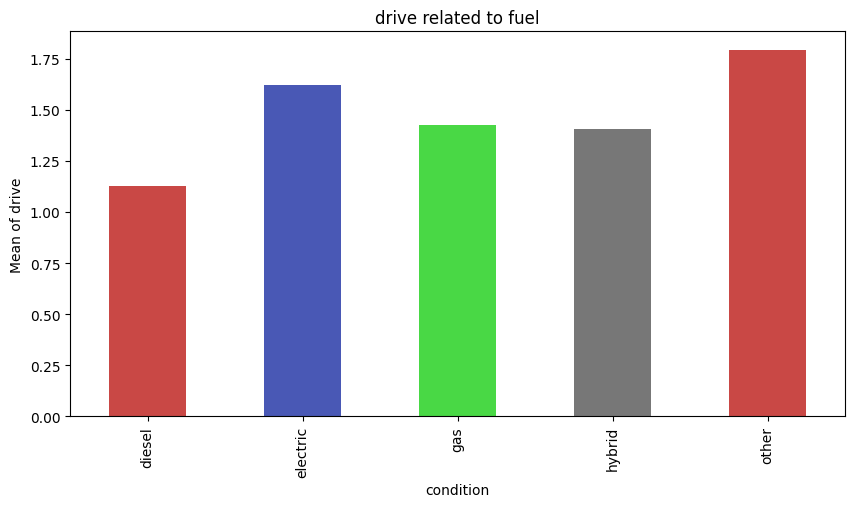

In [24]:
condition=train.loc[:,["fuel","drive"]]
plt.figure(figsize=(10,5))
x=condition["fuel"]
y=condition["drive"].groupby(x).mean()
y.plot.bar(title="drive related to fuel",
           grid=False, color=['#C94845', '#4958B5', '#49D845', '#777777']).set(xlabel="condition",ylabel="Mean of drive")

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var_mod = ['manufacturer', 'fuel']
for i in var_mod:
    train[i] = le.fit_transform(train[i])


In [ ]:
features = ['manufacturer', 'fuel']
df_train = train[features + ['drive']]

df_missing_drive = df_train[df_train['drive'].isnull()]
df_complete_drive = df_train.dropna()

X = df_complete_drive[features]
y = df_complete_drive['drive']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
std=StandardScaler()
X_train=std.fit_transform(X_train)
X_test=std.transform(X_test)


In [ ]:
# search grid

grid = {
   'n_neighbors':[1,2,5,10,50,100] 
}
knn  = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv = 2)
knn_cv.fit(X_train,y_train)
print("Best Parameters:",knn_cv.best_params_)
print("Train Score:",knn_cv.best_score_)

In [ ]:
model = KNeighborsClassifier(n_neighbors=100)
model.fit(X, y)

X_missing_drive = df_missing_drive[features]
imputed_values = model.predict(X_missing_drive)

train.loc[train['drive'].isnull(), 'drive'] = imputed_values



In [ ]:
le = LabelEncoder()

var_mod = ['manufacturer', 'fuel']
for i in var_mod:
    test[i] = le.fit_transform(test[i])

In [ ]:
# Step 1: Create a new DataFrame with relevant features
features = ['manufacturer', 'fuel']
df_test = test[features + ['drive']]

# Step 2: Separate the rows with missing 'Drive' values and complete values
df_missing_drive = df_test[df_test['drive'].isnull()]
df_complete_drive = df_test.dropna()

# Step 3: Train a model (Random Forest Classifier) to predict 'Drive'
X = df_complete_drive[features]
y = df_complete_drive['drive']
model = KNeighborsClassifier()
model.fit(X, y)

# Step 4: Use the trained model to predict the missing 'Drive' values
X_missing_drive = df_missing_drive[features]
imputed_values = model.predict(X_missing_drive)

# Step 5: Update the 'Drive' column in the 'train' DataFrame with the imputed values
test.loc[test['drive'].isnull(), 'drive'] = imputed_values

In [ ]:
train.isnull().sum()

## cylinders

In [ ]:
train.cylinders.value_counts()

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=train.cylinders)
plt.xlabel("Count")
plt.ylabel("cylinders")
plt.title("Train cylinders frequency")
plt.xticks(rotation=90)
plt.show

In [ ]:
train.cylinders.fillna('other', inplace=True)
test.cylinders.fillna('other', inplace=True)

train.loc[((train['cylinders'] == '10 cylinders')|(train['cylinders'] == '3 cylinders')|(train['cylinders'] == '12 cylinders')|(train['cylinders'] == '5 cylinders')), 'cylinders'] = 'other'
test.loc[((test['cylinders'] == '10 cylinders')|(test['cylinders'] == '3 cylinders')|(test['cylinders'] == '12 cylinders')|(test['cylinders'] == '5 cylinders')), 'cylinders'] = 'other'

In [ ]:
plt.figure(figsize=(10,3))
sns.countplot(x=train.cylinders)
plt.xlabel("cylinders")
plt.ylabel("Count")
plt.title("Train cylinders frequency")
plt.xticks(rotation=90)
plt.show

## type

In [ ]:
train.type.value_counts()

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=train.type)
plt.xlabel("Count")
plt.ylabel("type")
plt.title("Train type frequency")
plt.xticks(rotation=90)
plt.show

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=train.type,y=train.price)
plt.xlabel("Count")
plt.ylabel("type")
plt.title("Train type frequency")
plt.xticks(rotation=90)
plt.show

In [ ]:
plt.figure(figsize=(8,10))
sns.barplot(y=train.type,x=train.price,hue=train.cylinders)
plt.xlabel("price")
plt.ylabel("type")
plt.title("affect the cylinders on the type")
plt.xticks(rotation=90)
plt.show

In [ ]:
plt.figure(figsize=(15,20))
sns.barplot(y=train.type,x=train.price,hue=train.drive)
plt.xlabel("price")
plt.ylabel("type")
plt.title("affecting drive on the price")
plt.xticks(rotation=90)
plt.show

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var_mod = ['cylinders', 'drive']
for i in var_mod:
    train[i] = le.fit_transform(train[i])


In [ ]:
features = [ 'drive','cylinders']
df_train = train[features + ['type']]

df_missing_cylinders = df_train[df_train['type'].isnull()]
df_complete_cylinders = df_train.dropna()


X = df_complete_cylinders[features]
y = df_complete_cylinders['type']


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
std=StandardScaler()
X_train=std.fit_transform(X_train)
X_test=std.transform(X_test)

In [ ]:
df_train

In [ ]:
# search grid

grid = {
   'n_neighbors':[1,5,10,20,50,100,500] 
}
knn  = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv = 5)
knn_cv.fit(X_train,y_train)
print("Best Parameters:",knn_cv.best_params_)
print("Train Score:",knn_cv.best_score_)

In [ ]:
imputed_values.shape,train.type.isnull().sum()

In [ ]:

model = KNeighborsClassifier(n_neighbors=500)
model.fit(X, y)
print(model.score(X,y))

X_missing_cylinders = df_missing_cylinders[features]
imputed_values = model.predict(X_missing_cylinders)





In [ ]:
train.loc[train['type'].isnull(), 'type'] = imputed_values

In [ ]:
le = LabelEncoder()

var_mod = ['cylinders', 'drive']
for i in var_mod:
    test[i] = le.fit_transform(test[i])
    


In [ ]:
features = ['cylinders', 'drive']
df_test = test[features + ['type']]


df_missing_cylinders = df_test[df_test['type'].isnull()]
df_complete_cylinders = df_test.dropna()

X = df_complete_cylinders[features]
y = df_complete_cylinders['type']

model = KNeighborsClassifier(n_neighbors=500)
model.fit(X, y)

X_missing_cylinders = df_missing_cylinders[features]
imputed_values = model.predict(X_missing_cylinders)


test.loc[test['type'].isnull(), 'type'] = imputed_values

In [ ]:
train.to_csv("C:\\Users\\GTS\\Desktop\\AI Fatima\\Competitions\\Used Car Price Prediction\\modified\\Tmodified.csv",index=False)
test.to_csv("C:\\Users\\GTS\\Desktop\\AI Fatima\\Competitions\\Used Car Price Prediction\\modified\\Smodified.csv",index=False)

In [ ]:
train

In [ ]:
train.price.isnull().sum()